`Дисциплина: Методы и технологии машинного обучения`   
`Уровень подготовки: бакалавриат`   
`Направление подготовки: 01.03.02 Прикладная математика и информатика`   
`Семестр: осень 2021/2022`   




# Лабораторная работа №1: Оценка точности модели с непрерывной зависимой переменной

В практических примерах ниже показано:   

* как делить данные на выборки (обучающую и тестовую);  
* как считать MSE: среднеквадратическую ошибку модели;  
* как меняются MSE на тестовой и обучающей выборках с изменением гибкости (числа степеней свободы) модели.  

*Модели*: сглаживающие сплайны.   
*Данные*: сгенерированные.   

Рассмотрим пример из лекции: как меняется поведение ошибок на тестовой и обучающей выборках при различном числе степеней свободы, если функция зависимости отклика $Y$ от единственного признака $X$ известна. Сгенерируем $X$ и $Y$:

* $X \sim U(5, 105)$   
* $Y = f(X) + \epsilon$, где $f(X) = 15 + 0.02\cdot X - 0.005\cdot(X-45)^2 + 0.00006\cdot(X-54)^3;$ $\epsilon \sim N(0, 1)$.  


### Генерируем исходные данные

In [55]:
# загрузка пакетов
import numpy as np
import random

In [71]:
# задаём ядро генератора случайных чисел (внимание: не глобально)
np.random.seed(8)

# всего наблюдений, доля обучающей выборки
n_all_1 = 300
n_all_2 = 250 
n_all_3 = 200
train_percent = 0.85

# параметры распределения X
x_min, x_max = 5, 105

# генерируем X
x_1 = np.random.uniform(x_min, x_max, n_all_1)
x_2 = np.random.uniform(x_min, x_max, n_all_2)
x_3 = np.random.uniform(x_min, x_max, n_all_3)

# генерируем случайный шум
mu, sigma = 0, 1
res_1 = np.random.normal(mu, sigma, n_all_1)
res_2 = np.random.normal(mu, sigma, n_all_2)
res_3 = np.random.normal(mu, sigma, n_all_3)

# отбираем наблюдения в обучающую выборку
in_train_1 = np.random.choice(np.arange(n_all_1), int(n_all_1 * train_percent), 
                            replace=False)
in_train_2 = np.random.choice(np.arange(n_all_2), int(n_all_2 * train_percent), 
                            replace=False)
in_train_3 = np.random.choice(np.arange(n_all_3), int(n_all_3 * train_percent), 
                            replace=False)

# истинная функция взаимосвязи
def y_func (x) :
    return(15 + 2e-02*x - 5e-03*(x-45)**2 + 0.06e-03*(x-54)**3)
    
# для графика истинной взаимосвязи
x_line_1 = np.linspace(x_min, x_max, n_all_1)
y_line_1 = y_func(x_line_1)

x_line_2 = np.linspace(x_min, x_max, n_all_2)
y_line_2 = y_func(x_line_2)

x_line_3 = np.linspace(x_min, x_max, n_all_3)
y_line_3 = y_func(x_line_3)

# фактические значения y (с шумом)
y_1 = y_func(x_1) + res_1
y_2 = y_func(x_2) + res_2
y_3 = y_func(x_3) + res_3

# создаём векторы с данными для построения графиков
# наблюдения на обучающей выборке
x_train_1 = x[in_train_1]
y_train_1 = y[in_train_1]

x_train_2 = x[in_train_2]
y_train_2 = y[in_train_2]

x_train_3 = x[in_train_3]
y_train_3 = y[in_train_3]

# наблюдения на тестовой выборке
x_test_1 = np.delete(x_1, in_train_1)
y_test_1 = np.delete(y_1, in_train_1)

x_test_2 = np.delete(x_2, in_train_2)
y_test_2 = np.delete(y_2, in_train_2)

x_test_3 = np.delete(x_3, in_train_3)
y_test_3 = np.delete(y_3, in_train_3)



### Строим графики   

Изобразим исходные данные на графике.   

In [72]:
# загрузка пакетов
import matplotlib.pyplot as plt

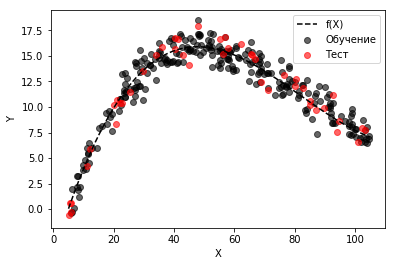

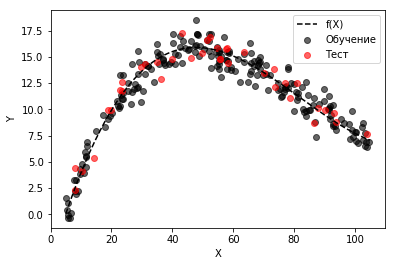

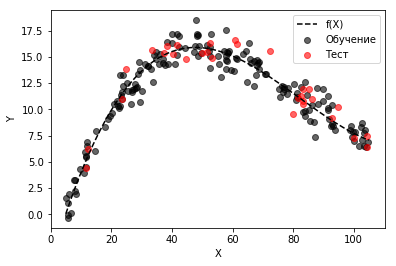

In [73]:
# график 1: исходные данные
#  обучающая выборка
plt.scatter(x_train_1, y_train_1, color='black', label='Обучение', alpha=0.6)

#  тестовая выборка
plt.scatter(x_test_1, y_test_1, color='red', label='Тест', alpha=0.6)

#  истинная функция взаимосвязи
plt.plot(x_line_1, y_line_1, color='black', linestyle='dashed', label='f(X)')

#  подписи осей
plt.xlabel('X')
plt.ylabel('Y')

#  легенда
plt.legend()
plt.show()

#  обучающая выборка
plt.scatter(x_train_2, y_train_2, color='black', label='Обучение', alpha=0.6)

#  тестовая выборка
plt.scatter(x_test_2, y_test_2, color='red', label='Тест', alpha=0.6)

#  истинная функция взаимосвязи
plt.plot(x_line_2, y_line_2, color='black', linestyle='dashed', label='f(X)')

#  подписи осей
plt.xlabel('X')
plt.ylabel('Y')

#  легенда
plt.legend()
plt.show()

#  обучающая выборка
plt.scatter(x_train_3, y_train_3, color='black', label='Обучение', alpha=0.6)

#  тестовая выборка
plt.scatter(x_test_3, y_test_3, color='red', label='Тест', alpha=0.6)

#  истинная функция взаимосвязи
plt.plot(x_line_3, y_line_3, color='black', linestyle='dashed', label='f(X)')

#  подписи осей
plt.xlabel('X')
plt.ylabel('Y')

#  легенда
plt.legend()
plt.show()

## Обучаем модели и оцениваем их точность

В качестве модели используем сплайны со степенями свободы от 2 (прямая) до 40 (количество узлов равно 2/3 наблюдений). Строим модели с различным количеством степеней свободы и в каждом случае считаем среднеквадратическую ошибку модели на обучающей и тестовой выборках.    

In [74]:
# загрузка пакетов
from pandas import DataFrame
import rpy2.robjects as robjects

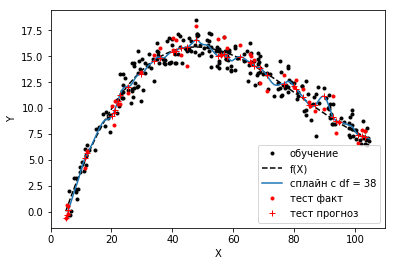

In [91]:
# модель натурального сплайна с заданным количеством узлов (df)
my_df = 38

# сохраняем индексы отсортированного по возрастанию x из обучающей выборки
x_sorted_index_1 = sorted(range(len(x_train_1)), key=lambda k: x_train[k])
x_sorted_index_2 = sorted(range(len(x_train_2)), key=lambda k: x_train[k])
x_sorted_index_3 = sorted(range(len(x_train_3)), key=lambda k: x_train[k])

# равноотстоящие координаты по X для прорисовки сглаженной кривой
x_train_lin_1 = np.linspace(min(x_train_1), max(x_train_1), num=300, endpoint=True)
x_train_lin_2 = np.linspace(min(x_train_2), max(x_train_2), num=300, endpoint=True)
x_train_lin_3 = np.linspace(min(x_train_3), max(x_train_3), num=300, endpoint=True)

# создаём из данных объекты, понятные R
r_x_1 = robjects.FloatVector(x_train_1)
r_y_1 = robjects.FloatVector(y_train_1)

r_x_2 = robjects.FloatVector(x_train_2)
r_y_2 = robjects.FloatVector(y_train_2)

r_x_3 = robjects.FloatVector(x_train_3)
r_y_3 = robjects.FloatVector(y_train_3)

# импортируем нужную функцию из R
r_smooth_spline = robjects.r['smooth.spline']

# строим сглаживающий сплайн
fit_1 = r_smooth_spline(x=r_x_1, y=r_y_1, df=my_df)

# делаем прогнозы
y_hat_train_1 = np.array(robjects.r['predict'](fit_1, 
    robjects.FloatVector(x_train_1)).rx2('y'))
y_hat_test_1 = np.array(robjects.r['predict'](fit_1, 
    robjects.FloatVector(x_test_1)).rx2('y'))
y_lin_plot_1 = np.array(robjects.r['predict'](fit_1, 
    robjects.FloatVector(x_train_lin_1)).rx2('y'))

# строим график
plt.plot(x_train_1, y_train_1, color='black', ls='', marker='.', label='обучение')
plt.plot(x_line_1, y_line_1, color='black', ls='dashed', marker='', label='f(X)')
plt.plot(x_train_lin_1, y_lin_plot_1, marker='', label='сплайн с df = %s' % my_df)
plt.plot(x_test_1, y_test_1, color='red', ls='', marker='.', label='тест факт')
plt.plot(x_test_1, y_hat_test_1, color='red', ls='', marker='+', label='тест прогноз')
#  подписи осей
plt.xlabel('X')
plt.ylabel('Y')
# легенда
plt.legend(loc='best')


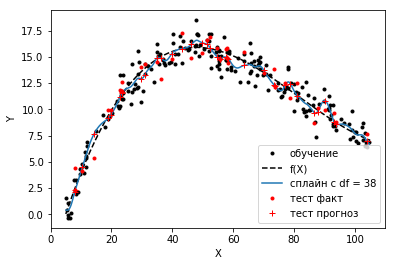

In [92]:
# строим сглаживающий сплайн
fit_2 = r_smooth_spline(x=r_x_2, y=r_y_2, df=my_df)

# делаем прогнозы
y_hat_train_2 = np.array(robjects.r['predict'](fit_2, 
    robjects.FloatVector(x_train_2)).rx2('y'))
y_hat_test_2 = np.array(robjects.r['predict'](fit_2, 
    robjects.FloatVector(x_test_2)).rx2('y'))
y_lin_plot_2 = np.array(robjects.r['predict'](fit_2, 
    robjects.FloatVector(x_train_lin_2)).rx2('y'))

# строим график
plt.plot(x_train_2, y_train_2, color='black', ls='', marker='.', label='обучение')
plt.plot(x_line_2, y_line_2, color='black', ls='dashed', marker='', label='f(X)')
plt.plot(x_train_lin_2, y_lin_plot_2, marker='', label='сплайн с df = %s' % my_df)
plt.plot(x_test_2, y_test_2, color='red', ls='', marker='.', label='тест факт')
plt.plot(x_test_2, y_hat_test_2, color='red', ls='', marker='+', label='тест прогноз')
#  подписи осей
plt.xlabel('X')
plt.ylabel('Y')
# легенда
plt.legend(loc='best')

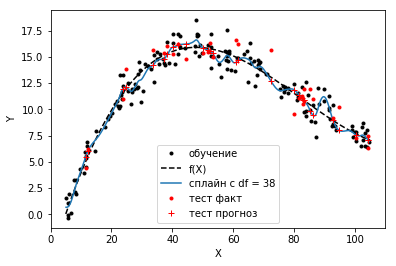

In [93]:
# строим сглаживающий сплайн
fit_3 = r_smooth_spline(x=r_x_3, y=r_y_3, df=my_df)

# делаем прогнозы
y_hat_train_3 = np.array(robjects.r['predict'](fit_3, 
    robjects.FloatVector(x_train_3)).rx2('y'))
y_hat_test_3 = np.array(robjects.r['predict'](fit_3, 
    robjects.FloatVector(x_test_3)).rx2('y'))
y_lin_plot_3 = np.array(robjects.r['predict'](fit_3, 
    robjects.FloatVector(x_train_lin_3)).rx2('y'))

# строим график
plt.plot(x_train_3, y_train_3, color='black', ls='', marker='.', label='обучение')
plt.plot(x_line_3, y_line_3, color='black', ls='dashed', marker='', label='f(X)')
plt.plot(x_train_lin_3, y_lin_plot_3, marker='', label='сплайн с df = %s' % my_df)
plt.plot(x_test_3, y_test_3, color='red', ls='', marker='.', label='тест факт')
plt.plot(x_test_3, y_hat_test_3, color='red', ls='', marker='+', label='тест прогноз')
#  подписи осей
plt.xlabel('X')
plt.ylabel('Y')
# легенда
plt.legend(loc='best')

In [ ]:
# считаем MSE
MSE_fit_1 = [sum((y_train_1 - y_hat_train_1)**2) / len(y_train_1),
          sum((y_test_1 - y_hat_test_1)**2) / len(y_test_1)]
MSE_fit_2 = [sum((y_train_2 - y_hat_train_2)**2) / len(y_train_2),
          sum((y_test_2 - y_hat_test_2)**2) / len(y_test_2)]
MSE_fit_3 = [sum((y_train_3 - y_hat_train_3)**2) / len(y_train_3),
          sum((y_test_3 - y_hat_test_3)**2) / len(y_test_3)]

Ошибки на обучающей и тестовой выборках составили соответственно:

In [76]:
# выводим MSE с округлением
MSE_1 = np.around(MSE_fit_1, 2)
MSE_2 = np.around(MSE_fit_2, 2)
MSE_3 = np.around(MSE_fit_3, 2)

In [77]:
MSE_1

array([0.83, 0.89])

In [78]:
MSE_2

array([0.77, 0.98])

In [79]:
MSE_3

array([0.73, 1.54])

In [80]:
#  Теперь строим модели с df от 2 до 40 ########################################

# максимальное число степеней свободы для модели сплайна
max_df = 40

# фрейм данных для сохранения MSE на обучающей и на тестовой 
#  при разных степенях свободы
MSE_all_dfs_1 = [[0] * 2 for i in range(2, max_df+1)]
MSE_all_dfs_1 = DataFrame(MSE_all_dfs_1, columns=['MSE_train', 'MSE_test'],
                       index=list(range(2, max_df+1)))

MSE_all_dfs_2 = [[0] * 2 for i in range(2, max_df+1)]
MSE_all_dfs_2 = DataFrame(MSE_all_dfs_2, columns=['MSE_train', 'MSE_test'],
                       index=list(range(2, max_df+1)))

MSE_all_dfs_3 = [[0] * 2 for i in range(2, max_df+1)]
MSE_all_dfs_3 = DataFrame(MSE_all_dfs_3, columns=['MSE_train', 'MSE_test'],
                       index=list(range(2, max_df+1)))

# заполняем фрейм
for i_df in range(2, max_df+1) :
    
    # обучаем модель
    fit_1 = r_smooth_spline(x=r_x_1, y=r_y_1, df=i_df)
    fit_2 = r_smooth_spline(x=r_x_2, y=r_y_2, df=i_df)
    fit_3 = r_smooth_spline(x=r_x_3, y=r_y_3, df=i_df)
    
    # прогноз на обучающей выборке
    y_train_hat_1 = np.array(robjects.r['predict'](fit_1, 
        robjects.FloatVector(x_train_1)).rx2('y'))
    y_train_hat_2 = np.array(robjects.r['predict'](fit_2, 
        robjects.FloatVector(x_train_2)).rx2('y'))
    y_train_hat_3 = np.array(robjects.r['predict'](fit_3, 
        robjects.FloatVector(x_train_3)).rx2('y'))
    
    # прогноз на тестовой выборке
    y_test_hat_1 = np.array(robjects.r['predict'](fit_1, 
        robjects.FloatVector(x_test_1)).rx2('y'))
    y_test_hat_2 = np.array(robjects.r['predict'](fit_2, 
        robjects.FloatVector(x_test_2)).rx2('y'))
    y_test_hat_3 = np.array(robjects.r['predict'](fit_3, 
        robjects.FloatVector(x_test_3)).rx2('y'))
    
    # считаем MSE
    MSE_all_dfs_1.loc[i_df, 'MSE_train'] = sum((y_train_1 - y_train_hat_1)**2) / len(y_train_hat_1)
    MSE_all_dfs_1.loc[i_df, 'MSE_test'] = sum((y_test_1 - y_test_hat_1)**2) / len(y_test_hat_1)
    
    MSE_all_dfs_2.loc[i_df, 'MSE_train'] = sum((y_train_2 - y_train_hat_2)**2) / len(y_train_hat_2)
    MSE_all_dfs_2.loc[i_df, 'MSE_test'] = sum((y_test_2 - y_test_hat_2)**2) / len(y_test_hat_2)
    
    MSE_all_dfs_3.loc[i_df, 'MSE_train'] = sum((y_train_3 - y_train_hat_3)**2) / len(y_train_hat_3)
    MSE_all_dfs_3.loc[i_df, 'MSE_test'] = sum((y_test_3 - y_test_hat_3)**2) / len(y_test_hat_3)
    

Минимум MSE на тестовой выборке достигается при числе степеней свободы:  

In [81]:
# фильтруем таблицу по минимальной MSE на тестовой выборке
MSE_all_dfs_1[MSE_all_dfs_1['MSE_test'] == min(MSE_all_dfs_1['MSE_test'])]

,MSE_train,MSE_test
31,0.86395,0.880886


In [82]:
# фильтруем таблицу по минимальной MSE на тестовой выборке
MSE_all_dfs_2[MSE_all_dfs_2['MSE_test'] == min(MSE_all_dfs_2['MSE_test'])]

,MSE_train,MSE_test
8,0.992082,0.770284


In [83]:
# фильтруем таблицу по минимальной MSE на тестовой выборке
MSE_all_dfs_3[MSE_all_dfs_3['MSE_test'] == min(MSE_all_dfs_3['MSE_test'])]

,MSE_train,MSE_test
7,1.002203,1.121028


Изобразим на графике динамику MSE на обучающей и тестовой выборках в зависимости от степеней свободы модели. 

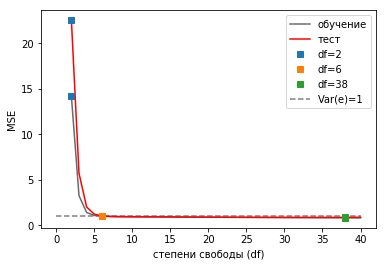

In [94]:
# график изменения MSE с увеличением df
plt.plot(MSE_all_dfs_1.index, MSE_all_dfs_1['MSE_train'], color='dimgrey', 
         marker='', label='обучение')
plt.plot(MSE_all_dfs_1.index, MSE_all_dfs_1['MSE_test'], color='red', 
         marker='', label='тест')
plt.plot([2, 2], [MSE_all_dfs_1.iloc[0]['MSE_train'], MSE_all_dfs_1.iloc[0]['MSE_test']],
         ls='', marker='s', label='df=2')
plt.plot([6, 6], [MSE_all_dfs_1.iloc[4]['MSE_train'], MSE_all_dfs_1.iloc[4]['MSE_test']],
         ls='', marker='s', label='df=6')
plt.plot([38, 38], [MSE_all_dfs_1.iloc[36]['MSE_train'], MSE_all_dfs_1.iloc[36]['MSE_test']],
         ls='', marker='s', label='df=38')
plt.hlines(1, 0, 40, linestyles='dashed', color='grey', label='Var(e)=1')
#  подписи осей
plt.xlabel('степени свободы (df)')
plt.ylabel('MSE')
# легенда
plt.legend(loc='best')

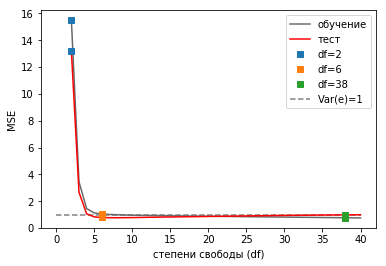

In [95]:
# график изменения MSE с увеличением df
plt.plot(MSE_all_dfs_2.index, MSE_all_dfs_2['MSE_train'], color='dimgrey', 
         marker='', label='обучение')
plt.plot(MSE_all_dfs_2.index, MSE_all_dfs_2['MSE_test'], color='red', 
         marker='', label='тест')
plt.plot([2, 2], [MSE_all_dfs_2.iloc[0]['MSE_train'], MSE_all_dfs_2.iloc[0]['MSE_test']],
         ls='', marker='s', label='df=2')
plt.plot([6, 6], [MSE_all_dfs_2.iloc[4]['MSE_train'], MSE_all_dfs_2.iloc[4]['MSE_test']],
         ls='', marker='s', label='df=6')
plt.plot([38, 38], [MSE_all_dfs_2.iloc[36]['MSE_train'], MSE_all_dfs_2.iloc[36]['MSE_test']],
         ls='', marker='s', label='df=38')
plt.hlines(1, 0, 40, linestyles='dashed', color='grey', label='Var(e)=1')
#  подписи осей
plt.xlabel('степени свободы (df)')
plt.ylabel('MSE')
# легенда
plt.legend(loc='best')

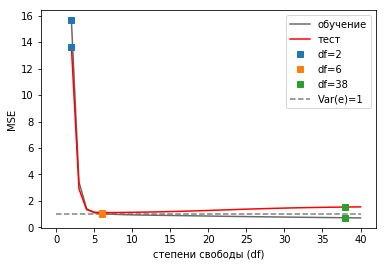

In [96]:
# график изменения MSE с увеличением df
plt.plot(MSE_all_dfs_3.index, MSE_all_dfs_3['MSE_train'], color='dimgrey', 
         marker='', label='обучение')
plt.plot(MSE_all_dfs_3.index, MSE_all_dfs_3['MSE_test'], color='red', 
         marker='', label='тест')
plt.plot([2, 2], [MSE_all_dfs_3.iloc[0]['MSE_train'], MSE_all_dfs_3.iloc[0]['MSE_test']],
         ls='', marker='s', label='df=2')
plt.plot([6, 6], [MSE_all_dfs_3.iloc[4]['MSE_train'], MSE_all_dfs_3.iloc[4]['MSE_test']],
         ls='', marker='s', label='df=6')
plt.plot([38, 38], [MSE_all_dfs_3.iloc[36]['MSE_train'], MSE_all_dfs_3.iloc[36]['MSE_test']],
         ls='', marker='s', label='df=38')
plt.hlines(1, 0, 40, linestyles='dashed', color='grey', label='Var(e)=1')
#  подписи осей
plt.xlabel('степени свободы (df)')
plt.ylabel('MSE')
# легенда
plt.legend(loc='best')

Кривая MSE на обучающей выборке стабильно снижается с ростом узлов сплайна. Чем больше наблюдений, через которые прошёл сплайн, тем точнее модель. Это говорит о переобучении. Лучшую модель следуют выбирать по минимуму на кривой MSE на тестовой выборке.

In [85]:
sorted?